In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("data.csv")
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [31]:
df.head(10)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [4]:
df.tail()

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [5]:
df.shape

(4009, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [7]:
df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [8]:
df.value_counts(['Label'])

Label
0        2137
1        1872
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

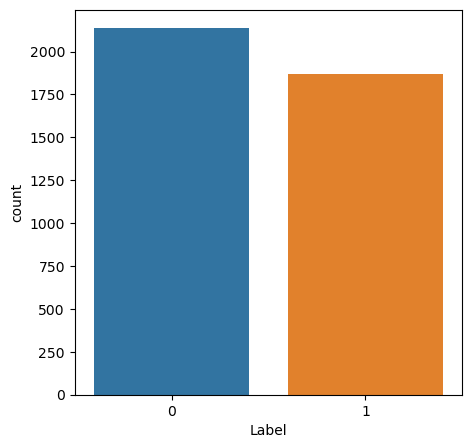

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='Label',data=df)

In [10]:
y=df['Label']
y


0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

In [15]:
x=df.drop(['Label','URLs','Headline'],axis=1)
x

,Body
0,Image copyright Getty Images\nOn Sunday mornin...
1,"LONDON (Reuters) - “Last Flag Flying”, a comed..."
2,The feud broke into public view last week when...
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4,"Country singer Jason Aldean, who was performin..."
...,...
4004,Trends to Watch\n% of readers think this story...
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006,NaN
4007,SHANGHAI (Reuters) - China said it plans to ac...


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Body']=le.fit_transform(x['Body'])
x

,Body
0,1288
1,1521
2,2431
3,1580
4,863
...,...
4004,2542
4005,2555
4006,2863
4007,2129


In [28]:
x.head(10)

,Body
0,1288
1,1521
2,2431
3,1580
4,863
5,1441
6,1369
7,2397
8,2154
9,954


In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [18]:
x.shape,X_train.shape,X_test.shape

((4009, 1), (3608, 1), (401, 1))

In [34]:
forest=RandomForestClassifier()

In [35]:
forest.fit(X_train,y_train)
X_train_pred=forest.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

forest.fit(X_test,y_test)
X_test_pred=forest.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9988913525498891
accuracy score of test data: 0.9975062344139651


In [36]:
tree=DecisionTreeClassifier()

In [37]:
tree.fit(X_train,y_train)
X_train_pred=tree.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tree.fit(X_test,y_test)
X_test_pred=tree.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9991685144124168
accuracy score of test data: 0.9975062344139651


In [38]:
input_data=(1441)
input_data_as_np=np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=tree.predict(input_data_reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
if(prediction[0]==1):
    print('Fake news')
else:
    print('Not fake')

Fake news
